# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [21]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import urllib

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [22]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 574


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [23]:
import requests

# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=metric&appid=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if i % 50 == 0 and i >= 50:
        set_count += 1
        record_count = 1
        #sleep(5)
    # Create endpoint URL with each city
    city_url = url + "&q=" + city.replace(" ", "+")
   # print(city_url)
    #break

    # Log the url, record, and set numbers
    print(f"Processing Record {record_count} of Set {set_count} | {city}")

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Send a GET request to the OpenWeatherMap API
        response = requests.get(city_url)

        # If the response is successful (status code 200), parse the JSON and retrieve data
        #if response.status_code == 200:
        city_weather = response.json()

            # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

            # Append the City information into city_data list
        city_data.append({
            "City": city,
            "Lat": city_lat,
            "Lng": city_lng,
            "Max Temp": city_max_temp,
            "Humidity": city_humidity,
            "Cloudiness": city_clouds,
            "Wind Speed": city_wind,
            "Country": city_country,
            "Date": city_date
        })

       # else:
            #print(f"Error: {response.status_code} - {response.content}")

    # If an error is experienced, skip the city
    except Exception as e:
        print(f"City not found. Skipping... Error: {str(e)}")

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")


Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | umm kaddadah
Processing Record 2 of Set 1 | shiqian
Processing Record 3 of Set 1 | adamstown
Processing Record 4 of Set 1 | udachny
Processing Record 5 of Set 1 | iskateley
Processing Record 6 of Set 1 | okhotsk
Processing Record 7 of Set 1 | rongelap
Processing Record 8 of Set 1 | massawa
Processing Record 9 of Set 1 | college
Processing Record 10 of Set 1 | villa canales
Processing Record 11 of Set 1 | port-aux-francais
Processing Record 12 of Set 1 | puerto natales
Processing Record 13 of Set 1 | ribeira grande
Processing Record 14 of Set 1 | rajula
Processing Record 15 of Set 1 | port elizabeth
Processing Record 16 of Set 1 | kapa'a
Processing Record 17 of Set 1 | olonkinbyen
Processing Record 18 of Set 1 | saipan
Processing Record 19 of Set 1 | alotau
City not found. Skipping... Error: 'coord'
Processing Record 20 of Set 1 | san antonio de pale
Processing Record 21 of Set 1 | bubaque
Processing R

Processing Record 36 of Set 4 | puerto san carlos
City not found. Skipping... Error: 'coord'
Processing Record 37 of Set 4 | suva
Processing Record 38 of Set 4 | st austell
Processing Record 39 of Set 4 | darovskoy
Processing Record 40 of Set 4 | mount gambier
Processing Record 41 of Set 4 | yeongdong
Processing Record 42 of Set 4 | pacific grove
Processing Record 43 of Set 4 | haiku-pauwela
Processing Record 44 of Set 4 | petropavlovsk-kamchatsky
Processing Record 45 of Set 4 | manikpur
Processing Record 46 of Set 4 | kirensk
Processing Record 47 of Set 4 | holualoa
Processing Record 48 of Set 4 | jamestown
Processing Record 49 of Set 4 | luninyets
Processing Record 50 of Set 4 | vilyuchinsk
Processing Record 1 of Set 5 | griffith
Processing Record 2 of Set 5 | cabo san lucas
Processing Record 3 of Set 5 | dodge city
Processing Record 4 of Set 5 | cairns city
City not found. Skipping... Error: 'coord'
Processing Record 5 of Set 5 | afaahiti
Processing Record 6 of Set 5 | minas de marc

Processing Record 18 of Set 8 | mirny
Processing Record 19 of Set 8 | yaren
Processing Record 20 of Set 8 | santa cruz
Processing Record 21 of Set 8 | karratha
Processing Record 22 of Set 8 | porto novo
Processing Record 23 of Set 8 | ayr
Processing Record 24 of Set 8 | mahibadhoo
Processing Record 25 of Set 8 | pemangkat
Processing Record 26 of Set 8 | harstad
Processing Record 27 of Set 8 | urengoy
Processing Record 28 of Set 8 | i-n-salah
Processing Record 29 of Set 8 | bamako
Processing Record 30 of Set 8 | bonthe
Processing Record 31 of Set 8 | sinabang
Processing Record 32 of Set 8 | antonio enes
Processing Record 33 of Set 8 | kalemie
Processing Record 34 of Set 8 | inhambane
Processing Record 35 of Set 8 | mount pearl
Processing Record 36 of Set 8 | selfoss
Processing Record 37 of Set 8 | siwa oasis
Processing Record 38 of Set 8 | ta`u
Processing Record 39 of Set 8 | keflavik
Processing Record 40 of Set 8 | crozon
Processing Record 41 of Set 8 | atamyrat
Processing Record 42 of

Processing Record 5 of Set 12 | gaogou
Processing Record 6 of Set 12 | shangri-la
City not found. Skipping... Error: 'coord'
Processing Record 7 of Set 12 | port augusta
Processing Record 8 of Set 12 | acapulco de juarez
Processing Record 9 of Set 12 | toga village
City not found. Skipping... Error: 'coord'
Processing Record 10 of Set 12 | fiambala
Processing Record 11 of Set 12 | sidney
Processing Record 12 of Set 12 | makurazaki
Processing Record 13 of Set 12 | poronaysk
Processing Record 14 of Set 12 | hadibu
Processing Record 15 of Set 12 | kingscliff
Processing Record 16 of Set 12 | corner brook
Processing Record 17 of Set 12 | rio grande
Processing Record 18 of Set 12 | khuzdar
Processing Record 19 of Set 12 | castillos
Processing Record 20 of Set 12 | ketrzyn
Processing Record 21 of Set 12 | 'ain boucif
Processing Record 22 of Set 12 | ain defla
Processing Record 23 of Set 12 | camacupa
Processing Record 24 of Set 12 | neryungri
-----------------------------
Data Retrieval Compl

In [24]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()


City          539
Lat           539
Lng           539
Max Temp      539
Humidity      539
Cloudiness    539
Wind Speed    539
Country       539
Date          539
dtype: int64

In [25]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,umm kaddadah,13.6017,26.6876,28.05,22,5,3.02,SD,1684983347
1,shiqian,27.5225,108.2281,21.32,93,100,1.26,CN,1684983348
2,adamstown,-25.0660,-130.1015,23.61,71,45,2.66,PN,1684983348
3,udachny,66.4167,112.4000,1.36,92,100,6.61,RU,1684983348
4,iskateley,67.6803,53.1512,16.31,75,98,3.82,RU,1684983348


In [26]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [27]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,umm kaddadah,13.6017,26.6876,28.05,22,5,3.02,SD,1684983347
1,shiqian,27.5225,108.2281,21.32,93,100,1.26,CN,1684983348
2,adamstown,-25.0660,-130.1015,23.61,71,45,2.66,PN,1684983348
3,udachny,66.4167,112.4000,1.36,92,100,6.61,RU,1684983348
4,iskateley,67.6803,53.1512,16.31,75,98,3.82,RU,1684983348


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

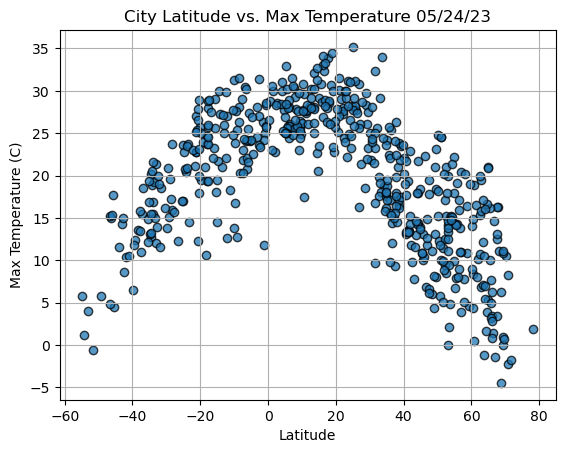

In [28]:
# Extract latitude and max temperature data from city_data
latitudes = [data["Lat"] for data in city_data]
max_temps = [data["Max Temp"] for data in city_data]

# Build scatter plot for latitude vs. temperature
plt.scatter(latitudes, max_temps, edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature " + time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show() 

#### Latitude Vs. Humidity

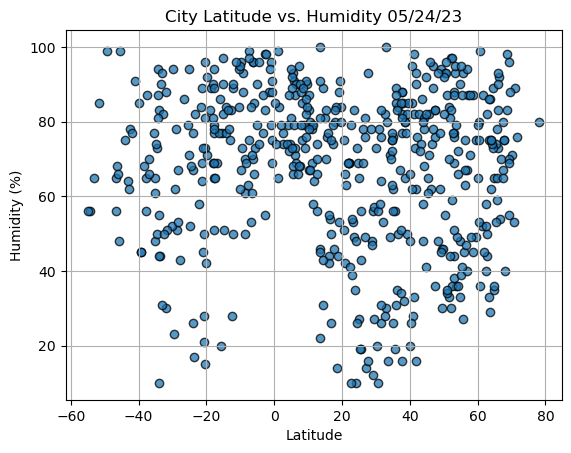

In [29]:
# Extract latitude and humidity data from city_data
latitudes = [data["Lat"] for data in city_data]
city_humidity = [data["Humidity"] for data in city_data]

# Build scatter plot for latitude vs. humidity
plt.scatter(latitudes, city_humidity, edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity " + time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()




#### Latitude Vs. Cloudiness

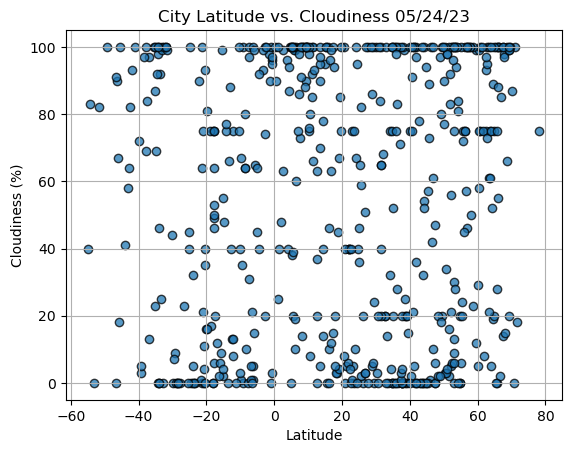

In [30]:
# Extract latitude and cloudiness data from city_data
latitudes = [data["Lat"] for data in city_data]
city_clouds = [data["Cloudiness"] for data in city_data]

# Build scatter plot for latitude vs. humidity
plt.scatter(latitudes, city_clouds, edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness " + time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

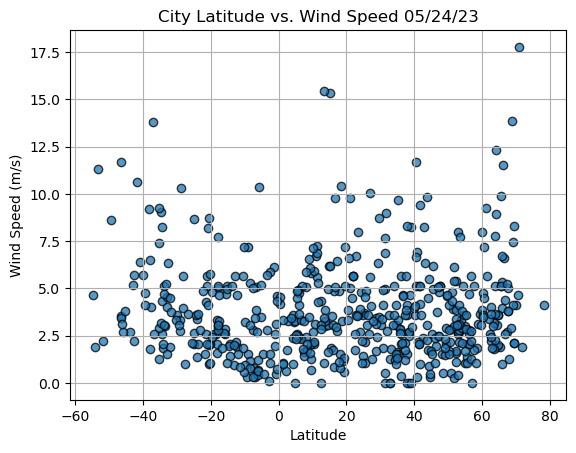

In [31]:
# Build the scatter plots for latitude vs. wind speed
latitudes = [data["Lat"] for data in city_data]
city_wind = [data["Wind Speed"] for data in city_data]

# Build scatter plot for latitude vs. humidity
plt.scatter(latitudes, city_wind, edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed " + time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [32]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    
    # Compute linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.text(0.05, 0.9, line_eq, fontsize=12, color="red", transform=plt.gca().transAxes)
    plt.xlabel("Latitude")
    plt.ylabel(title)
    print(f"The r-value is: {rvalue**2}")
    plt.show()


In [33]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,umm kaddadah,13.6017,26.6876,28.05,22,5,3.02,SD,1684983347
1,shiqian,27.5225,108.2281,21.32,93,100,1.26,CN,1684983348
3,udachny,66.4167,112.4000,1.36,92,100,6.61,RU,1684983348
4,iskateley,67.6803,53.1512,16.31,75,98,3.82,RU,1684983348
5,okhotsk,59.3833,143.3000,4.61,75,99,3.66,RU,1684983348


In [34]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,adamstown,-25.0660,-130.1015,23.61,71,45,2.66,PN,1684983348
10,port-aux-francais,-49.3500,70.2167,5.73,99,100,8.61,TF,1684983348
11,puerto natales,-51.7236,-72.4875,-0.57,85,82,2.24,CL,1684983348
14,port elizabeth,-33.9180,25.5701,16.84,83,0,5.14,ZA,1684983349
18,san antonio de pale,-1.4014,5.6325,26.35,88,98,6.16,GQ,1684983349


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.6643985433097623


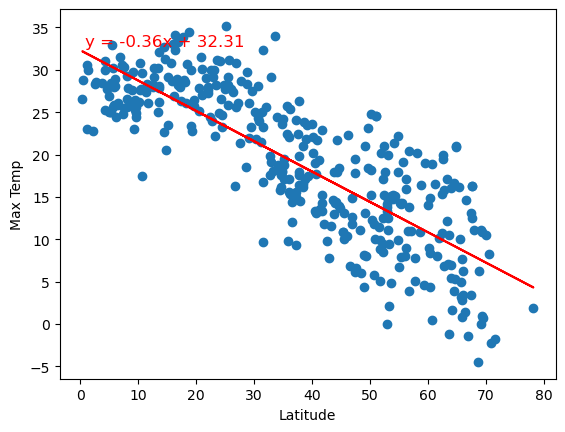

In [37]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Max Temp",(0,6))

#regress_values = x_values * slope + intercept
#line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#plt.scatter(x_values,y_values)
#plt.plot(x_values,regress_values,"r-")
#plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
#plt.xlabel('Latitude')
#plt.ylabel('Max Temp')
#plt.show()

The r-value is: 0.5550684800920496


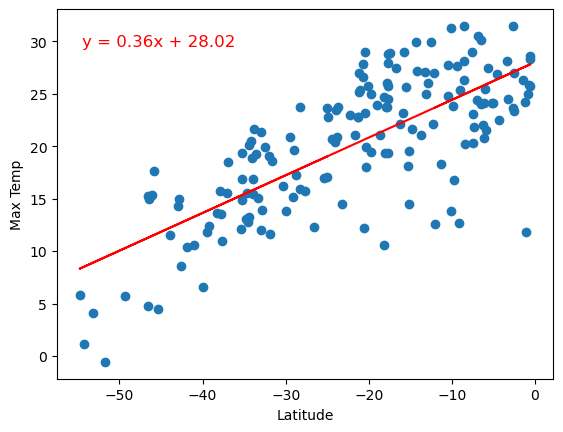

In [38]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Max Temp",(6,0))


**Discussion about the linear relationship:** There is a pretty strong correlation between the Max Temperature and latitude.  The closer the latitude is to 0, the higher the Max Temp is.  The Northern Hemisphere has a strong negative correlation as the latitude is increasing away from 0, and the Southern Hemisphere has a positive correlation as the latitude is increasing and getting closer to 0.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.002062961516426141


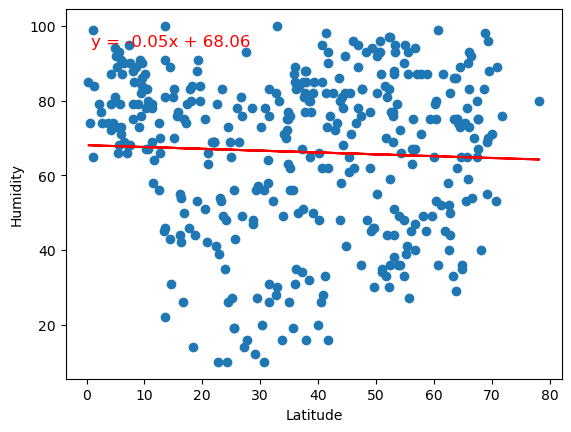

In [39]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, "Humidity",(6,0))


The r-value is: 0.06731152626272002


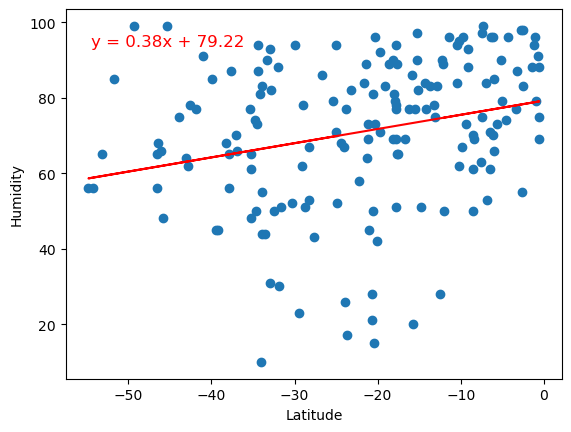

In [40]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, "Humidity",(6,0))


**Discussion about the linear relationship:** In both of these graphs, there are small r values and pretty flat linear regression lines.  There appears to be no correlation ebtewen latitude and humidity in the Northern and Southern Hemispheres.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.0008092267364668901


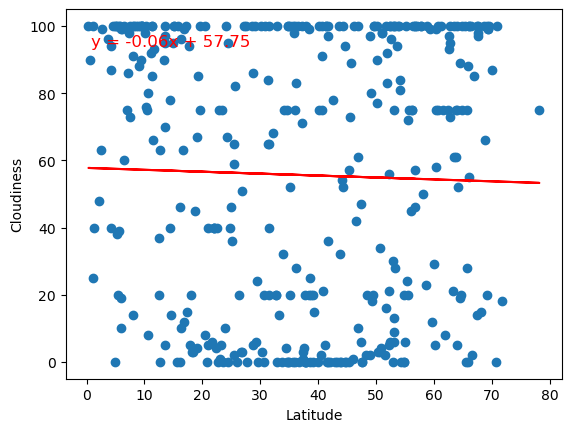

In [41]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, "Cloudiness",(6,0))


The r-value is: 0.006022513681774543


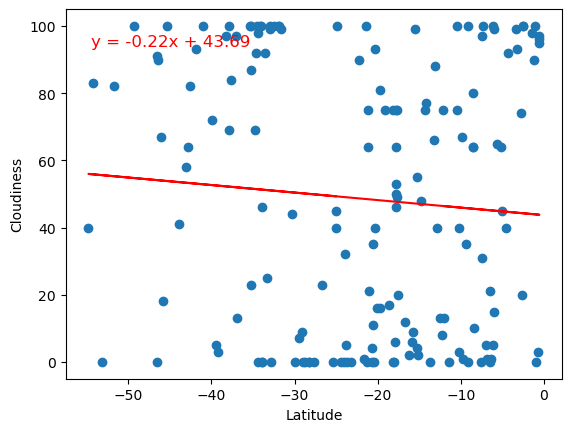

In [42]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, "Cloudiness",(6,0))


**Discussion about the linear relationship:** In both the Northern and Southern Hemispheres, the r values are very small and the linear regression lines are relaatively flat, indicating no correlation between cloudiness and latitude.  Both graphs have the points scattered, though there are some clusters at the top and bottom of the charts.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.0035667049475246286


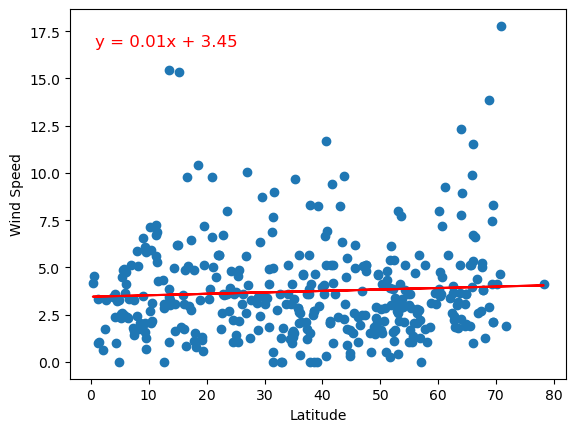

In [43]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, "Wind Speed",(6,0))

The r-value is: 0.11499984753207451


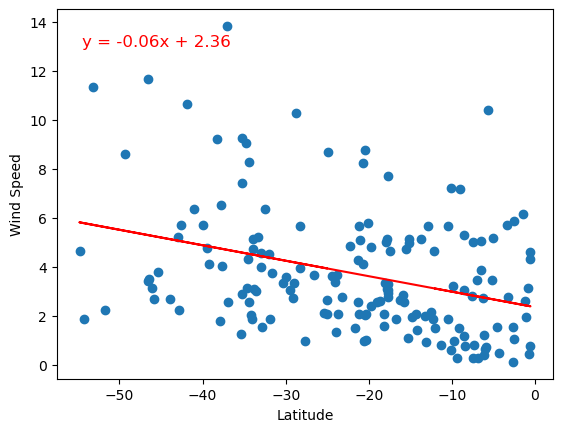

In [44]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, "Wind Speed",(6,0))

**Discussion about the linear relationship:** There is not a strong correlation between wind speed and latitude.  The linear regression is slightly positive in the Northern Hemisphere and slightly negative in the Southern hemisphere, so the wind speed is slightly higher the further away the latitude gets from 0, the r value is very low and the lines are relatively flat.  